## Model project: The General Solow model and a Solow model with human capital

This model project solve and simulate the general Solow model and a Solow model with human capital following the notation of "Introducing advanced macroeconomics: Growth and business cycles" by Sørensen, P., & Whitta-Jacobsen, H. (2010).

## The General Solow model

The general Solow Model is similar to the basic Solow Model, but accounts for potentiel strict positive growth in GDP pr. worker. The general Solow Model is a generalization of the basic Solow Model that allows for technological progress as total factor productivity (TFP) increases over time.

The basic Solow can be generalized to the general Solow Model the following way.

$ Y_t = B_t K_t^\alpha L_t^{1-\alpha} = K_t^\alpha (A_t L_t)^{1-\alpha} , 0<\alpha<1 $,

where $A_t \equiv B_t^{\frac{1}{1-\alpha}}$ and $A$ is exogenous sequence of the total factor productivity (TFP) $B_t$. $A_t$ is also called the labor productivity variable. $Y$ is total output, $K_t$ is the capital stock, $L_t$ is the labor force, and $A_t$ is . All variables are indexed $t$ as the evolve over time. The difference between the basic and the general Solow model is that technology can change over time. Moreover we have the following equations:

$ A_{t + 1} = (1 + g)A_t , g>-1 $

$ L_{t+1} = (1+n) L_t, n>-1 $

$K_{t+1} - K_t = S_t -\delta K_t $

$ S_t = s Y_t , 0<s<1$

where $ g_t = \alpha g_t^k + (1-\alpha) g_t^A $. Labor productivity $A_t$ is changing with the exogenous rate $g$ in every period and exogenous technological growth is thus assumed. The labor force becomes more productive in each period without the use of economic ressources. The labor force $L_t$ grows with the rate $n$ in each period. Capital accumulates through savings $S_t$ and depreciates with the rate $\delta$. Savings constitutes a constant fraction $s$ of total output $Y_t$ as the households saves the fraction $s$ of their income in each period.

As opposed to the basic Solow model, it is assumed that there are two sources of economic growth in the general Solow model. Both capital accumulation and technological progress are sources of growth.


We derive capital and output per effective worker in the following way.

$\tilde{k}_t = \frac{K_t}{A_t L_t} = \frac{k_t}{A_t}$

$\tilde{y}_t = \frac{Y_t}{A_t L_t} = \frac{y_t}{A_t} $

According to the production function we can derive $ \tilde{y}_t$ as

$ \tilde{y}_t = \frac{Y_t}{A_t L_t} = \frac{K_t^\alpha (A_t L_t)^{1-\alpha}}{A_t L_t}= K_t^\alpha (A_t L_t)^{-\alpha} = \left( \frac{K_t}{A_t L_t} \right)^\alpha= \tilde{k}_t^\alpha$

Imports and set magics:

In [1]:
#Import of packages
import numpy as np

import sympy as sm
sm.init_printing(pretty_print = True)
from sympy import symbols
from sympy.interactive import printing

import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.widgets import Slider

from scipy import linalg
from scipy import optimize as opt
from scipy import optimize

import pandas as pd

import math

from IPython.display import display
import ipywidgets as widgets

#Autoload
%load_ext autoreload
%autoreload 2

In [2]:
#Next we define all our variables.
#Defining variables
Y = sm.symbols('Y_t')     
K = sm.symbols('K_t')
A = sm.symbols('A_t')
L = sm.symbols('L_t')

g = sm.symbols('g')
s = sm.symbols('s')
n = sm.symbols('n')

y = sm.symbols('y_t')
k = sm.symbols('k_t')

K_next = sm.symbols('K_{t+1}')
A_next = sm.symbols('A_{t+1}')
L_next = sm.symbols('L_{t+1}')

k_next = sm.symbols('k_{t+1}')

k_tilde = sm.symbols('\\tilde{k}_t')
y_tilde = sm.symbols('\\tilde{y}_t')

k_tilde_next = sm.symbols('\\tilde{k}_{t+1}')

k_star = sm.symbols('k^*')
y_star = sm.symbols('y^*')

k_tilde_star = sm.symbols('\\tilde{k}^*')
y_tilde_star = sm.symbols('\\tilde{y}^*')

r = sm.symbols('r_t')
w = sm.symbols('w_t')

alpha = sm.symbols('alpha')
delta = sm.symbols('delta')

### Real factor prices of capital and labor
First step is to derive the real factor prices of the capital and labor input, i.e. $r_t$ and $w_t$. We derive them as the derivatives of $Y$ with respect to $K$ and $L$. 

We use sympy to differentiate $Y$ first for $K$, and solve for $r_t$. $r_t$ is the rental rate.

In [3]:
foc_rt = sm.Eq(sm.simplify(sm.diff(K**(alpha) * (A*L)**(1-alpha), K)),r)
foc_rt

The expression can be rewritten as so it follows the textbook notation (Sørensen & Whitta-Jacobsen, 2010).

$r_t = \alpha (\frac{K_t}{A_t L_t})^{\alpha-1} = \alpha (\tilde{k}_t)^{\alpha-1}$

Similarly we for $L$, we differentiate with respect to $L$ and solve for $w_t$. $w_t$ is the wage rate.

In [4]:
foc_wt = sm.Eq(sm.simplify(sm.diff(K**(alpha) * (A*L)**(1-alpha), L)),w)
foc_wt

The expression can be rewritten as follows the textbook notation (Sørensen & Whitta-Jacobsen, 2010).

$w_t = (1-\alpha) \frac{K_t}{A_t L_t}^{\alpha} A_t =(1-\alpha) (\tilde{k}_t)^{\alpha} A_t$

### Transition equation

The next step is to find the transition equation. Insert $S_t$ in $K_{t+1}-K_t$, 
divide with $A_{t+1}\cdot L_{t+1}$ on both sides, the left hand side is equal to $\tilde{k}_{t+1}$, 
on the right hand side use that $A_{t+1}\cdot L_{t+1}=(1+n)(1+g)A_t\cdot L_t$, lastly insert $\tilde{y}_{t}$
$\tilde{k}_{t+1}=(1/(1+n)(1+g))\cdot s \tilde{k}^\alpha+(1-\delta)\tilde{k}_t$.


We define the transition equation. No further calculation is needed.

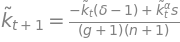

In [5]:
Transition_equation = sm.simplify(sm.Eq((1/((1+n)*(1+g)))*(s*k_tilde**(alpha)+(1-delta)*k_tilde), k_tilde_next))
Transition_equation

The transition equation can be rewritten to the following so it follows the textbook notation (Sørensen & Whitta-Jacobsen, 2010).

$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)} (s \tilde{k}_t^\alpha + (1-\delta) \tilde{k}_t)$

From the transition equation the Solow equation can be derived by subtracting $\tilde{k}_t$ on both sides.

$ \tilde{k}_{t+1} - \tilde{k}_t = \frac{1}{(1+n)(1+g)} (s \tilde{k}_t^\alpha - (n + g + \delta + n g) \tilde{k}_t $

### Steady state
In steady state we know that $k_{t+1}=k_t=k^*$, we insert $k^*$ for all $k$ in the transition equation. 
This gives: $k^*=\frac{1}{1+n}\cdot (1+g) \cdot s \cdot {k^*}^\alpha+(1-\delta)k^*$.
We solve for $k^*$ in steady state.

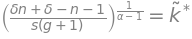

In [6]:
ss_k = sm.solve((1/(1+n)*(1+g))*s*k_star**alpha+(1-delta)*k_star, k_star) 
sm.Eq(ss_k[0], k_tilde_star)

To get $\tilde{y}^*$, we insert $\tilde{k}^*$ in $\tilde{y}$.
This gives: $y^*=\frac{1}{1+n}\cdot(1+g) \cdot s \cdot {k^*}^\alpha+(1-\delta)k^*$.
We define the SS. No further calculation is needed.

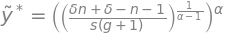

In [7]:
ss_y = sm.simplify(ss_k[0]**alpha) 
sm.Eq(y_tilde_star, ss_y)

In [8]:
#Defining solow as a function in a Solow diagram. Where the inputs is :
    #    k     (float): Capital
    #    delta (float): Depreciation
    #    n     (float): Population
    #    g     (float): Growth
    #    s     (float): Savings
    #    alpha (float): Share
def solow_diagram(k,s,n,g,delta,alpha):
    #Returns
        # savings path, plots y at different s
    svec = []
        # depreciation path, plots delta - depreciation over time
    deltavec = []

    for t in range(1,k):
        depreciation = (delta+n+g+n*g)*t
        deltavec.append(depreciation)
   
    for t in range(1,k):
        saved = s*t**alpha
        svec.append(saved)

    plt.figure(figsize=(10,10))
    plt.plot(deltavec[:k], label = '$(\delta +n+g+ng)\\tilde{k}_t$', color = 'black')

    plt.plot(svec[:k], color = 'blue')

    plt.xlim(0,k)
    plt.ylim(0,deltavec[-1])
    plt.xlabel('$k_t$')
    plt.grid(True)
    plt.legend()
    plt.legend(['$(\delta+n+g+ng)\\tilde{k}_t$', '$s\\tilde{k}_t^{\u03B1}$'])
    return plt.show()

In [9]:
#We have created an interactive graph, where it is possible to change the parameters and see the effect
widgets.interact(solow_diagram, 
                k_0     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '\u03B1' , min = 0 ,    max = 0.9 , step = 0.01 , value = 0.33),
                delta = widgets.FloatSlider(description = '\u03B4' , min = 0 ,    max = 0.9 , step = 0.01 , value = 0.01),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01, max = 0.9 , step = 0.01 , value = 0.70),
                n     = widgets.FloatSlider(description ='n',        min = -0.1 , max = 0.1 , step = 0.005, value = 0.00),
                g     = widgets.FloatSlider(description ='g',            min = -0.1 , max = 1 , step = 0.005, value = 0.04),
                k     = widgets.IntSlider(description='k' ,          min = 1,     max = 1001, step = 10,    value = 120))

interactive(children=(IntSlider(value=120, description='k', max=1001, min=1, step=10), FloatSlider(value=0.7, …

<function __main__.solow_diagram(k, s, n, g, delta, alpha)>

We see that if the savings rate $s$ increases, then the curve $s\tilde{k_t}^\alpha$ shifts upwards. Thus if the savings rate increases, then the steady state level of effective capital $\tilde{k}^{*}$ per worker increases. Similarly a higher capital share $\alpha$ increase the steady state level of capita per effective worker.

Oppositely, an increase in the population growth $n$ lowers the steady state level of capita per effective worker $\tilde{k}^{*}.$ Similarly, a higher technological growth rate $g$ and a higher depreciation rate $\delta$ decrease the steady state level of capital per effective worker.

## The Solow model with human capital

For a Solow model with human capital, a variable for human capital $H_t$ is added into the production function in the general Solow model. So that our production function is:

$ Y_t = K_t^\alpha H_t^\varphi (A_t L_t)^{1-\alpha-\varphi} , 0<\alpha<1 0<\varphi<1 \alpha + \varphi <1$

All variables are indexed $t$ as the evolve over time. Moreover we have the following equations:

$ A_{t + 1} = (1 + g)A_t , g>-1 $

$ L_{t+1} = (1+n) L_t, n>-1 $

$K_{t+1} - K_t = s_K Y_t -\delta K_t, 0<s_K<1$

$H_{t+1} - H_t = s_H Y_t -\delta H_t, 0<s_H<1 $

The differences from the general Solow model above and this one is the human capital. Furthermore the adding of the human capital gives the model an extra rate of savings, the constant fraction $s$ is swopped with a constant fraction $s_K$ of income invested in physical capital, and a constant fraction $s_H$ of income invested in human capital.

According to the production function we can derive $ \tilde{y}_t$ as

$\tilde{y}_t = k_t^\alpha h_t^\varphi A_t^{1-\alpha -\varphi} $

Where $k_t\equiv \frac{K_t}{L_t}$ and $h_t\equiv \frac{H_t}{L_t}$. In terms of capital and human capital per effictive worker we find:

$\tilde{k}_t = \left(\frac{s_K^{1-\varphi} s_H^{\varphi}}{\delta+n+g+ng}\right)^{\frac{1}{1-\alpha - \varphi}}$

$\tilde{h}_t = \left(\frac{s_K^{\alpha} s_H^{1-\alpha}}{\delta+n+g+ng}\right)^{\frac{1}{1-\alpha - \varphi}}$

Next we define our new variables

In [10]:
#Defining variables
k_ss  = sm.symbols('k_ss') 
phi   = sm.symbols('phi') 
s_k   = sm.symbols('s_k')
s_h   = sm.symbols('s_h')
k1_ss = sm.symbols('k1_ss')
h_ss  = sm.symbols('h_ss')

#In order to make the graph we need to chose actual numbers for our parameters
g     = 0.04
n     = 0.00
alpha = 0.33
delta = 0.01
s     = 0.70
phi = 0.33
s_k = 0.10
s_h = 0.12

### Steady state
In steady state we know that $k_{t+1}=k_t=k^*$. We find steady state of capital and human capital by solving for $k^*$. Moreover we will define these equations as symbolic, which we will use later for our transition diagram.

In [11]:
#SS for capital
k1_ss_sm = sm.Eq(k1_ss, ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)))
k1_ss_sol = sm.solve([k1_ss_sm],[k1_ss])

#The SS for capital
k1_ss_symbolic = ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))

#SS for human capital
h_ss_sm = sm.Eq(h_ss, ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)))
h_ss_sol = sm.solve([h_ss_sm],[h_ss])

#The SS for human capital
h_ss_symbolic = ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))

In [12]:
#Auxiliary functions for capital and human capital
def aux_k(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_k = ((n+g+delta+(n*g))/s_k)**(1/phi)*x**((1-alpha)/phi)
    return aux_k

def aux_h(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_h = (s_h/(n+g+delta+(n*g)))**(1/(1-phi))*x**(alpha/(1-phi))
    return aux_h

In [13]:
#Code to create capital and human capital accumulation
f = lambda k_ss: k_ss - ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 
h = lambda h_ss: h_ss - ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 

#Capital
def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

k1_ss = bisection(f,0,100,1e-8)

#Human capital
def bisection(h,a,b,tol=1e-8):

    # Test inputs
    if h(a) * h(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        h_m_n = h(m_n)
        
        # Step 3: Determine sub-interval
        if abs(h_m_n) < tol:
            return m_n
        elif h(a_n)*h_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif h(b_n)*h_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

h_ss = bisection(h,0,100,1e-8)

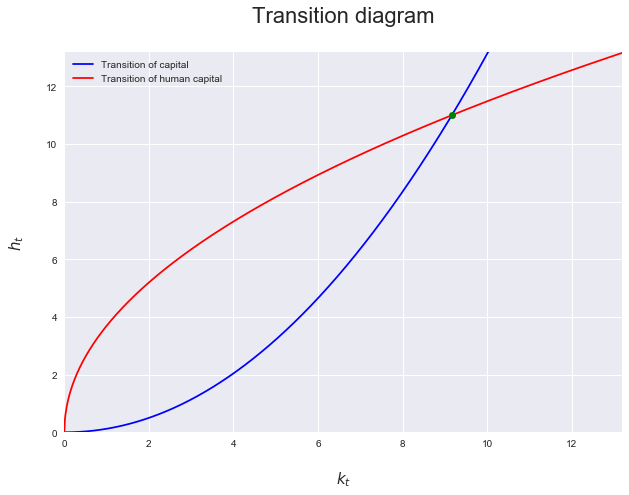

In [14]:
#Graph plot - transition diagram
hmin  = 0                                
hmax  = max(h_ss*1.2, k1_ss*1.2)           
h_set = np.linspace(hmin, hmax, 1000)      

k1min  = 0                          
k1max  = max(h_ss*1.2, k1_ss*1.2)    
k1_set = np.linspace(k1min, k1max, 1000) 

phase = plt.figure(figsize=(10,7))      

plt.xlim(0, k1max)                     
plt.ylim(0, hmax) 
#Accumulation of capital and human capital with auxiliary functions and the SS(symbolic) of capital and human capital
plt.plot(k1_set, aux_k(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'b-', 
         h_set, aux_h(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'r-',
        k1_ss_symbolic, h_ss_symbolic, 'go')                     
plt.xlabel('\n$k_{t}$',   size=15)         
plt.ylabel('$h_{t}$\n', size=15)           
plt.title('Transition diagram\n', size=22) 
plt.legend(('Transition of capital','Transition of human capital'),
           loc='upper left')            

plt.show()

# Conclusion
In this project we have analyzed the General Solow model by using Python.
This includes the general steps we know from deriving the transition equation and the solow equation and finding steady state. We have created an interactive plot showing the General Solow model and the steady state.
Moreover we have extended to the General Solow model by adding human capital. Here we found it interesting looking into human capital accumulation and capital accumulation by making a graph.